I will be following the notebooks from the Coursera course: AI Capstone Project with Deep Learning offered by IBM
https://www.coursera.org/learn/ai-deep-learning-capstone/home/welcome

The project will look at images of concrete and predict whether or not there is a crack in the concrete. This is important when it comes to structural health monitoring and inspection. We will be using the ResNet50 pretrained network and apply transfer learning from the learned representation of our positive and negatively labeled concrete photos.

# 1. Loading Data

## Download and unzip data

In [ ]:
# Data is available at this link in a zip file
#!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip

In [ ]:
# unzipping the file will give you a Posivive and Negative folder of images
#!unzip concrete_crack_images_for_classification.zip

## Import Libraries and Packages

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

## Load Images

### Loading data with os.scandir (slow!)

The standard approach to loading all images into data processing pipelines is to use os.scandir to iterate through each directory (./Negative and ./Positive), but let's demonstrate why that is not practical for deep learning applications.

In [4]:
negative_files = os.scandir('./concrete_data/Negative')
negative_files

In [5]:
# Grab the first file in the directory
file_name = next(negative_files)
file_name

<DirEntry '00001.jpg'>

In [6]:
# Only read elements of the directory if it is a file
os.path.isfile(file_name)

True

In [7]:
# Get the image name
image_name = str(file_name).split("'")[1]
image_name

'00001.jpg'

In [8]:
# Read in the image data
image_data = plt.imread('./concrete_data/Negative/{}'.format(image_name))
image_data

array([[[178, 175, 170],
        [173, 170, 165],
        [166, 163, 158],
        ...,
        [189, 186, 179],
        [189, 186, 179],
        [189, 186, 179]],

       [[176, 173, 168],
        [174, 171, 166],
        [167, 164, 159],
        ...,
        [185, 182, 175],
        [185, 182, 175],
        [185, 182, 175]],

       [[177, 174, 169],
        [176, 173, 168],
        [171, 168, 163],
        ...,
        [181, 178, 171],
        [181, 178, 171],
        [181, 178, 171]],

       ...,

       [[163, 159, 156],
        [159, 155, 152],
        [156, 152, 149],
        ...,
        [175, 171, 168],
        [174, 170, 167],
        [173, 169, 166]],

       [[165, 161, 158],
        [161, 157, 154],
        [157, 153, 150],
        ...,
        [175, 171, 168],
        [174, 170, 167],
        [173, 169, 166]],

       [[168, 164, 161],
        [163, 159, 156],
        [157, 153, 150],
        ...,
        [175, 171, 168],
        [174, 170, 167],
        [173, 169, 166]]

### What important features are there to note in image_data?

In [9]:
# Print the shape of the image matrices
print(image_data.shape)
print('Images are {} by {} pixels with {} color channels.'.format(image_data.shape[0],
                                                                  image_data.shape[1],
                                                                  image_data.shape[2]))

(227, 227, 3)
Images are 227 by 227 pixels with 3 color channels.


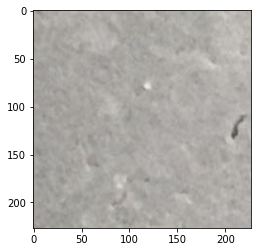

In [10]:
# View the image
plt.imshow(image_data)

Now we need to loop through the entire ./Negative directory.

This cell will demonstrate why os.scandir is not appropriate here:

In [11]:
%%time

negative_images = []
for file_name in negative_files:
    if os.path.isfile(file_name):
        image_name = str(file_name).split("'")[1]
        image_data = plt.imread('./concrete_data/Negative/{}'.format(image_name))
        negative_images.append(image_data)
        
negative_images = np.array(negative_images)

Wall time: 11.1 s


In [12]:
len(negative_images)

19999

### Use os.listdir and save each file's path as a variable instead of loading and saving the images themselves

In [13]:
negative_images = os.listdir('./concrete_data/Negative')
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

In [14]:
# Sort the images if they aren't already
negative_images.sort()
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

In [15]:
# To show images, we can also open them using the Image module from PIL
image_data = Image.open('./concrete_data/Negative/{}'.format(negative_images[0]))

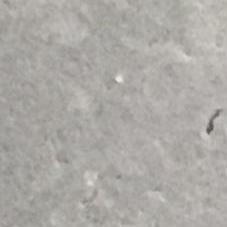

In [16]:
# Now we can view the image by calling this object
image_data

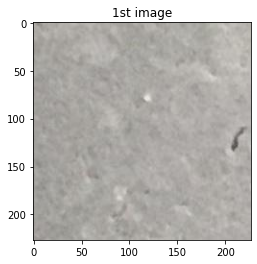

In [17]:
# or by using imshow
plt.imshow(image_data)
plt.title('1st image')
plt.show()

Loop through the directory using os.listdir and save their paths in a list:

In [18]:
negative_images_dir = ['./concrete_data/Negative/{}'.format(image) for image in negative_images]
negative_images_dir

['./concrete_data/Negative/00001.jpg',
 './concrete_data/Negative/00002.jpg',
 './concrete_data/Negative/00003.jpg',
 './concrete_data/Negative/00004.jpg',
 './concrete_data/Negative/00005.jpg',
 './concrete_data/Negative/00006.jpg',
 './concrete_data/Negative/00007.jpg',
 './concrete_data/Negative/00008.jpg',
 './concrete_data/Negative/00009.jpg',
 './concrete_data/Negative/00010.jpg',
 './concrete_data/Negative/00011.jpg',
 './concrete_data/Negative/00012.jpg',
 './concrete_data/Negative/00013.jpg',
 './concrete_data/Negative/00014.jpg',
 './concrete_data/Negative/00015.jpg',
 './concrete_data/Negative/00016.jpg',
 './concrete_data/Negative/00017.jpg',
 './concrete_data/Negative/00018.jpg',
 './concrete_data/Negative/00019.jpg',
 './concrete_data/Negative/00020.jpg',
 './concrete_data/Negative/00021.jpg',
 './concrete_data/Negative/00022.jpg',
 './concrete_data/Negative/00023.jpg',
 './concrete_data/Negative/00024.jpg',
 './concrete_data/Negative/00025.jpg',
 './concrete_data/Negativ

In [19]:
# Check how many "no crack" images are in our dataset
print('{} images with no cracks.'.format(len(negative_images_dir)))

20000 images with no cracks.


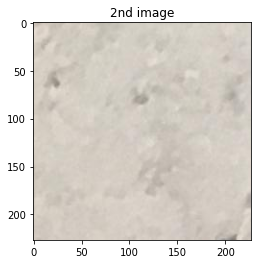

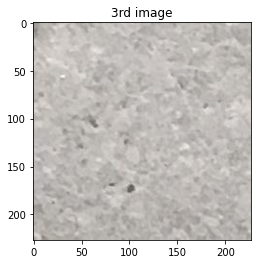

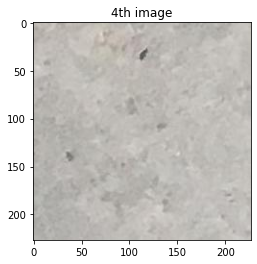

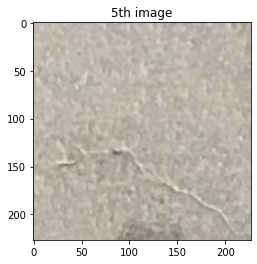

In [20]:
# Showing the next 4 images:
for i in range(1, 5):
    plt.imshow(Image.open(negative_images_dir[i]))
    plt.title('{} image'.format(['2nd', '3rd', '4th', '5th'][i - 1]))
    plt.show()

In [21]:
# Now get the ./Positive directory images
positive_images_dir = ['./concrete_data/Positive/{}'.format(filename) for filename in os.listdir('./concrete_data/Positive')]
positive_images_dir.sort()
positive_images_dir

['./concrete_data/Positive/00001.jpg',
 './concrete_data/Positive/00002.jpg',
 './concrete_data/Positive/00003.jpg',
 './concrete_data/Positive/00004.jpg',
 './concrete_data/Positive/00005.jpg',
 './concrete_data/Positive/00006.jpg',
 './concrete_data/Positive/00007.jpg',
 './concrete_data/Positive/00008.jpg',
 './concrete_data/Positive/00009.jpg',
 './concrete_data/Positive/00010.jpg',
 './concrete_data/Positive/00011.jpg',
 './concrete_data/Positive/00012.jpg',
 './concrete_data/Positive/00013.jpg',
 './concrete_data/Positive/00014.jpg',
 './concrete_data/Positive/00015.jpg',
 './concrete_data/Positive/00016.jpg',
 './concrete_data/Positive/00017.jpg',
 './concrete_data/Positive/00018.jpg',
 './concrete_data/Positive/00019.jpg',
 './concrete_data/Positive/00020.jpg',
 './concrete_data/Positive/00021.jpg',
 './concrete_data/Positive/00022.jpg',
 './concrete_data/Positive/00023.jpg',
 './concrete_data/Positive/00024.jpg',
 './concrete_data/Positive/00025.jpg',
 './concrete_data/Positiv

In [22]:
print('{} images with cracks.'.format(len(positive_images_dir)))

20000 images with cracks.


Cracked concrete images:


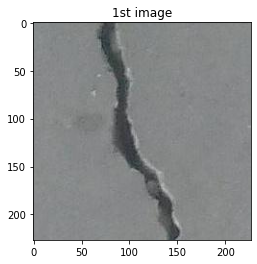

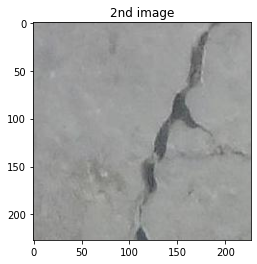

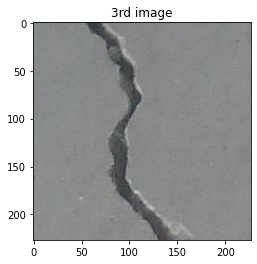

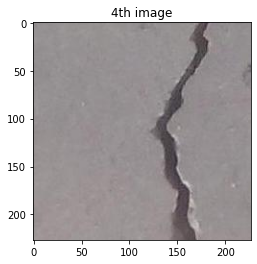

In [23]:
# First four images with cracks
print('Cracked concrete images:')
for i in range(4):
    plt.imshow(Image.open(positive_images_dir[i]))
    plt.title('{} image'.format(['1st', '2nd', '3rd', '4th'][i]))
    plt.show()

# 2. Data Preparation

## Import Libraries and Packages

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator

## Construct an ImageDataGenerator instance

We need to define the dataset directory and create in instance of the Keras ImageDataGenerator.

Let's create a standard pipeline as well as one that preprocesses the images with some scaling.

In [25]:
dataset_dir = './concrete_data'

In [26]:
os.listdir(dataset_dir)

['Negative', 'Positive']

#### Standard ImageDataGenerator

In [27]:
# Simply call the ImageDataGenerator module without any parameters to use in image generator pipeline
data_generator = ImageDataGenerator()

In [28]:
# Using flow_from_directory, loop through the images in batches
# Define the dataset directory, batch size, type of class, and a seed if you would like to reproduce this batch sampling later
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size = 4,
    class_mode = 'categorical',
    seed = 42)

Found 40000 images belonging to 2 classes.


In [29]:
# Access the batches using next() method
first_batch = image_generator.next()
first_batch

(array([[[[178., 177., 175.],
          [182., 181., 179.],
          [183., 182., 180.],
          ...,
          [169., 164., 160.],
          [170., 165., 161.],
          [172., 167., 163.]],
 
         [[181., 180., 178.],
          [180., 179., 177.],
          [173., 172., 170.],
          ...,
          [171., 166., 162.],
          [172., 167., 163.],
          [173., 168., 164.]],
 
         [[185., 184., 182.],
          [174., 173., 171.],
          [165., 164., 162.],
          ...,
          [175., 170., 166.],
          [174., 169., 165.],
          [173., 168., 164.]],
 
         ...,
 
         [[188., 183., 179.],
          [183., 178., 174.],
          [178., 173., 169.],
          ...,
          [174., 169., 163.],
          [175., 170., 164.],
          [176., 171., 165.]],
 
         [[187., 182., 178.],
          [183., 178., 174.],
          [178., 173., 169.],
          ...,
          [174., 169., 163.],
          [175., 170., 164.],
          [176., 171., 165.

In [30]:
# Get the images only (without the label)
first_batch_images = image_generator.next()[0]
first_batch_images

array([[[[194., 189., 185.],
         [194., 189., 185.],
         [195., 190., 186.],
         ...,
         [184., 181., 174.],
         [184., 181., 174.],
         [184., 181., 174.]],

        [[194., 189., 185.],
         [194., 189., 185.],
         [194., 189., 185.],
         ...,
         [185., 182., 175.],
         [184., 181., 174.],
         [184., 181., 174.]],

        [[193., 188., 184.],
         [194., 189., 185.],
         [194., 189., 185.],
         ...,
         [185., 182., 175.],
         [185., 182., 175.],
         [185., 182., 175.]],

        ...,

        [[ 90.,  81.,  76.],
         [ 90.,  81.,  76.],
         [ 90.,  81.,  76.],
         ...,
         [156., 151., 147.],
         [156., 151., 147.],
         [156., 151., 147.]],

        [[ 91.,  82.,  77.],
         [ 90.,  81.,  76.],
         [ 90.,  81.,  76.],
         ...,
         [154., 149., 145.],
         [154., 149., 145.],
         [154., 149., 145.]],

        [[ 91.,  82.,  77.],
       

In [31]:
# Get the labels only
first_batch_labels = image_generator.next()[1]
first_batch_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

#### Custom ImageDataGenerator

Within the Keras ImageDataGenerator function, we can specify transformations made to the data as it is processed.

We will standardize the RGB pixel values to be float decimal values between 0-1 instead of integers between 0-255.

In [32]:
data_generator = ImageDataGenerator(
    rescale = 1./255)

In [33]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size = 4,
    class_mode = 'categorical',
    seed = 42)

Found 40000 images belonging to 2 classes.


In [34]:
# Visualize the difference in batches
first_batch = image_generator.next()
first_batch

(array([[[[0.69803923, 0.69411767, 0.6862745 ],
          [0.7137255 , 0.70980394, 0.7019608 ],
          [0.7176471 , 0.7137255 , 0.7058824 ],
          ...,
          [0.6627451 , 0.6431373 , 0.627451  ],
          [0.6666667 , 0.64705884, 0.6313726 ],
          [0.6745098 , 0.654902  , 0.6392157 ]],
 
         [[0.70980394, 0.7058824 , 0.69803923],
          [0.7058824 , 0.7019608 , 0.69411767],
          [0.6784314 , 0.6745098 , 0.6666667 ],
          ...,
          [0.67058825, 0.6509804 , 0.63529414],
          [0.6745098 , 0.654902  , 0.6392157 ],
          [0.6784314 , 0.65882355, 0.6431373 ]],
 
         [[0.7254902 , 0.72156864, 0.7137255 ],
          [0.68235296, 0.6784314 , 0.67058825],
          [0.64705884, 0.6431373 , 0.63529414],
          ...,
          [0.6862745 , 0.6666667 , 0.6509804 ],
          [0.68235296, 0.6627451 , 0.64705884],
          [0.6784314 , 0.65882355, 0.6431373 ]],
 
         ...,
 
         [[0.7372549 , 0.7176471 , 0.7019608 ],
          [0.71764

## Visualize Batches of Images

Using the image_generator.next() function and subplots, we can visualize multiple batches at once.

In [35]:
first_batch = image_generator.next()
first_batch_images = first_batch[0]
first_batch_labels = first_batch[1]
second_batch = image_generator.next()
second_batch_images = second_batch[0]
second_batch_labels = second_batch[1]
third_batch = image_generator.next()
third_batch_images = third_batch[0]
third_batch_labels = third_batch[1]
fourth_batch = image_generator.next()
fourth_batch_images = fourth_batch[0]
fourth_batch_labels = fourth_batch[1]
fifth_batch = image_generator.next()
fifth_batch_images = fifth_batch[0]
fifth_batch_labels = fifth_batch[1]

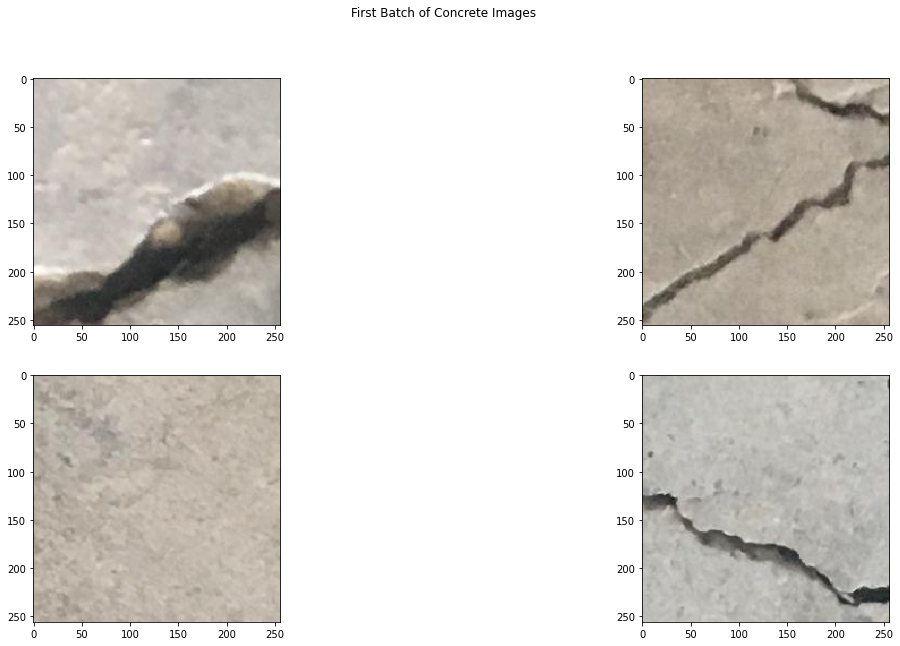

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

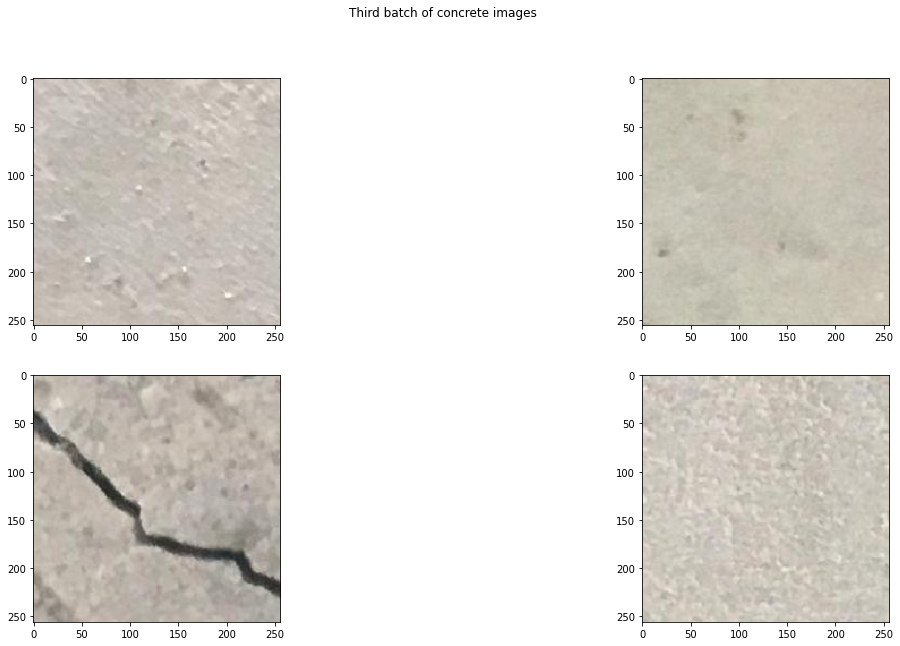

There are 3.0 negative image and 1.0 positive images.


In [37]:
def visualize_batch(images, ordinal):
    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

    i = 0
    for axis1 in axes:
        for axis2 in axis1:
            image_data = images[i]
            axis2.imshow(image_data)
            i += 1

    figure.suptitle("{} batch of concrete images".format(ordinal.title()))
    plt.show()


visualize_batch(third_batch_images, "third")
print("There are {} negative image and {} positive images.".format(round(third_batch_labels.T[0].sum(), 1), round(third_batch_labels.T[1].sum(), 1)))

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


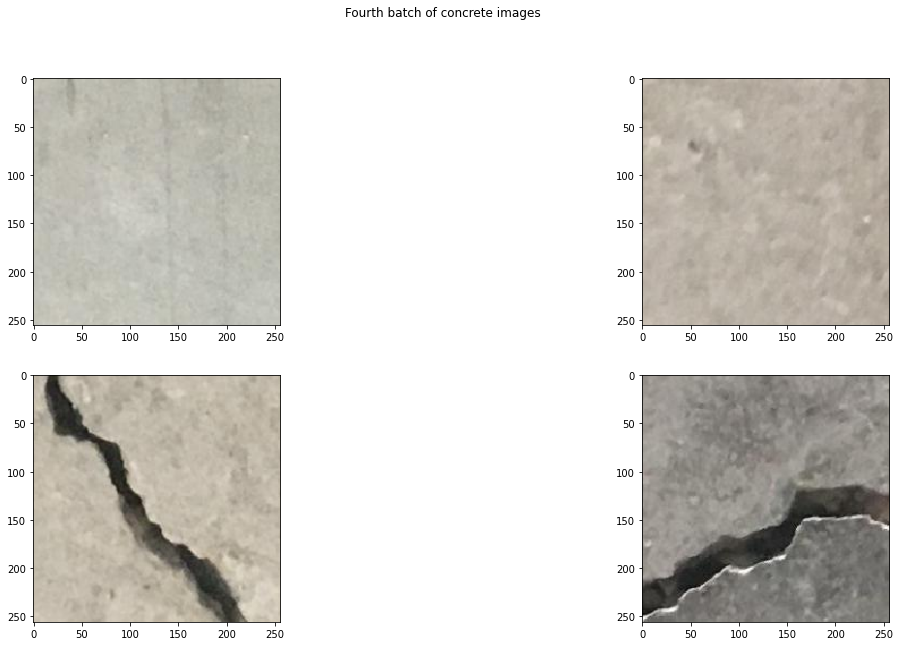

There are 2.0 negative image and 2.0 positive images.


In [38]:
print(fourth_batch_labels)
visualize_batch(fourth_batch_images, "fourth")
print("There are {} negative image and {} positive images.".format(round(fourth_batch_labels.T[0].sum(), 1), round(fourth_batch_labels.T[1].sum(), 1)))

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


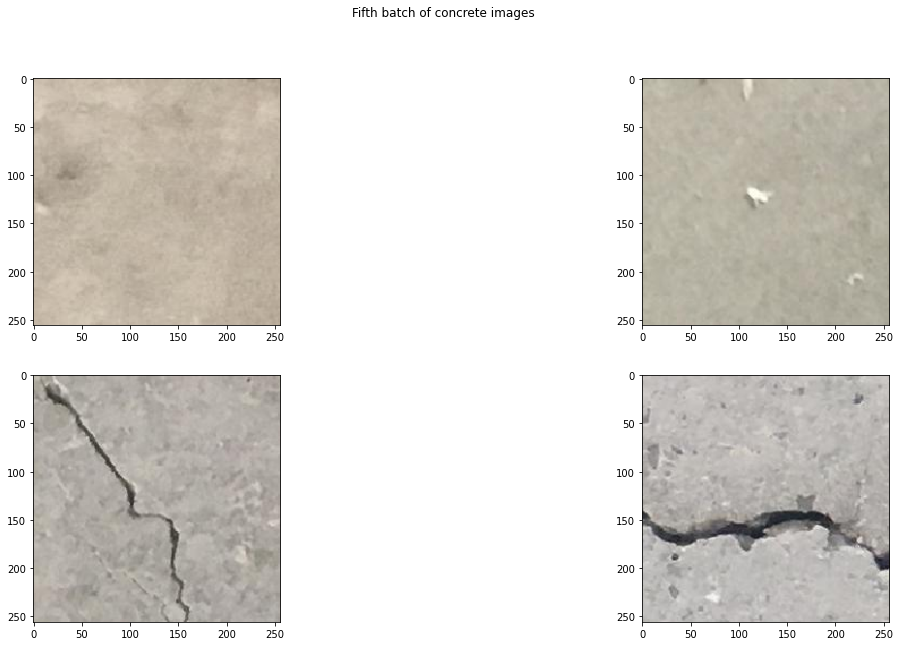

There are 2.0 negative image and 2.0 positive images.


In [39]:
print(fifth_batch_labels)
visualize_batch(fifth_batch_images, "fifth")
print("There are {} negative image and {} positive images.".format(round(fifth_batch_labels.T[0].sum(), 1), round(fifth_batch_labels.T[1].sum(), 1)))

## Create a loop to confirm the batches are randomly dispersed

By taking the transpose (.T) of the label matrix, we can sum the values to get a count of positive images in that batch.

This also confirms each batch contains 4 images.

In [40]:
batches = [first_batch, second_batch, third_batch, fourth_batch, fifth_batch]

In [41]:
for i, (batch_images, batch_labels) in enumerate(batches):
    print("Batch {}".format(i+1))
    print("There are {} negative images and {} positive images.".format(round(batch_labels.T[0].sum(), 1), round(batch_labels.T[1].sum(), 1)))

Batch 1
There are 1.0 negative images and 3.0 positive images.
Batch 2
There are 2.0 negative images and 2.0 positive images.
Batch 3
There are 3.0 negative images and 1.0 positive images.
Batch 4
There are 2.0 negative images and 2.0 positive images.
Batch 5
There are 2.0 negative images and 2.0 positive images.


# 3. Loading the Pretrained Model

## Imports and Packages

In [42]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense

from keras.applications.resnet50 import preprocess_input
from keras.applications import ResNet50

## Define Global Constants

1. We are dealing with 2 classes (crack or no crack)
2. The ResNet50 model was built using images of size (224, 224), so we need to resize our (227, 227) images to match
3. We are training and validating our model using batches of 100 images
4. I will also set the dataset variable again

In [43]:
dataset_dir = './concrete_data'

num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

## Construct ImageDataGenerator instances

Modify the generator to use the preprocess_input function that we imported from the ResNet50 applications module.

The original assignment gives the data in pre-split training and validation directories, but I decided to implement the train/validation split within the ImageDataGenerator function.

In [44]:
data_generator = ImageDataGenerator(
    validation_split = 0.25,
    preprocessing_function = preprocess_input)    # Create a 25% train/validation split

In [45]:
train_generator = data_generator.flow_from_directory(
    dataset_dir,
    target_size = (image_resize, image_resize),
    batch_size = batch_size_training,
    class_mode = 'categorical',
    subset = 'training')

Found 30000 images belonging to 2 classes.


In [46]:
validation_generator = data_generator.flow_from_directory(
    dataset_dir,
    target_size = (image_resize, image_resize),
    batch_size = batch_size_training,
    class_mode = 'categorical',
    subset = 'validation')

Found 10000 images belonging to 2 classes.


## Build, Compile, and Fit the Model (ResNet50)

In [47]:
model = Sequential()

Add ResNet50 pre-trained model to our Sequential Keras instance.

We don't want to include the top layer or the output layer, as we will be training these layers ourselves.

In [48]:
model.add(ResNet50(
    include_top = False,
    pooling = 'avg',
    weights = 'imagenet'))

Now we will define the output layer as a Dense layer containing 2 nodes and a Softmax activation function

In [49]:
model.add(Dense(num_classes, activation='softmax'))

In [50]:
model.layers

These are the two layers of our model:
1. The ResNet50 layer
2. The Dense layer we just defined

Details of ResNet50 layer:

In [51]:
model.layers[0].layers

We do not want to train the ResNet50 model because it has already been trained and we want to utilize this.

Set this layer to not be trained:

In [52]:
model.layers[0].trainable = False

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


Only 4,098 parameters are trainable, which is only the Dense layer (2048 inputs from ResNet50 layer x 2 nodes + 2 bias terms = 4098)

Now let's compile the model with the Adam optimizer:

In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

We need to set some more variables before training, specifically how many steps compose an epoch and the number of epochs to train on.

In [55]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

Since we are using ImageDataGenerator to process images from directories instead of storing all the processed data in memory, we need to implement the fit_generator method with our model.

*With newer updates, the model.fit() function supports generators as inputs*

In [56]:
fit_history = model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch_training,
    epochs = num_epochs,
    validation_data = validation_generator,
    validation_steps = steps_per_epoch_validation,
    verbose = 1)

Epoch 1/2
300/300 [==============================] - 1031s 3s/step - loss: 0.1107 - accuracy: 0.9518 - val_loss: 0.0058 - val_accuracy: 0.9985
Epoch 2/2
300/300 [==============================] - 1025s 3s/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.0039 - val_accuracy: 0.9988


This model is now pretty good at classifying images!

We can save this model for later to compare to other models:

In [57]:
model.save('concrete_resnet50_model.h5', include_optimizer=False)

# 4. Comparing ResNet50 model to VGG16 model

1. Now we can build an image classifier using the VGG16 pre-trained model for the same task using the same data.

2. We can compare the accuracy and predictions between the two models with a test dataset.

3. Finally, we will make predictions with both models and evaluate performance.

## Part 1: Build the VGG16 model

1. Import libraries, modules, and packages you will need. Make sure to import the preprocess_input function from keras.applications.vgg16.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the Adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

In [58]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

In [59]:
dataset_dir = './concrete_data'
num_classes = 2
batch_size = 100
image_size = (224, 224)

In [61]:
data_gen = ImageDataGenerator(
    validation_split = 0.25,
    preprocessing_function = preprocess_input)

train_gen = data_gen.flow_from_directory(
    dataset_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

validation_gen = data_gen.flow_from_directory(
    dataset_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation')

Found 30000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [62]:
vgg16model = Sequential()

vgg16model.add(VGG16(include_top=False, pooling='avg', weights='imagenet'))
vgg16model.add(Dense(num_classes, activation='softmax'))

vgg16model.layers[0].trainable = False

vgg16model.summary()

58892288/58889256 [==============================] - 5s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [64]:
vgg16model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
num_epochs = 2
steps_per_epoch_training = len(train_gen)
steps_per_epoch_validation = len(validation_gen)

history_vgg16 = vgg16model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_gen,
    validation_steps=steps_per_epoch_validation,
    verbose=1)

Epoch 1/2
300/300 [==============================] - 1711s 6s/step - loss: 0.3040 - accuracy: 0.8458 - val_loss: 0.0277 - val_accuracy: 0.9944
Epoch 2/2
300/300 [==============================] - 1691s 6s/step - loss: 0.0259 - accuracy: 0.9942 - val_loss: 0.0151 - val_accuracy: 0.9966


In [66]:
vgg16model.save('concrete_vgg16_model.h5', include_optimizer=False)

## Part 2: Compare the models

1. Load your saved model that was built using the ResNet50 model.
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the shuffle parameter and set it to False.
3. Use the evaluate_generator method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about evaluate_generator here.
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.

In [109]:
from keras.models import load_model

model_resnet50 = load_model('concrete_resnet50_model.h5')
model_vgg16 = load_model('concrete_vgg16_model.h5')

In [110]:
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [111]:
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
model_resnet50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [113]:
model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [68]:
vgg16model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [70]:
resnet50model = model # Rename to make comparison easier

In [72]:
resnet50model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [73]:
generator = ImageDataGenerator(preprocessing_function=preprocess_input)

testing_gen = generator.flow_from_directory(
    './test', target_size=image_size, shuffle=False)

Found 500 images belonging to 2 classes.


In [75]:
performance_vgg16 = vgg16model.evaluate(testing_gen)
print("Performance of the VGG16-trained model")
print("Loss: {}".format(round(performance_vgg16[0], 5)))
print("Accuracy: {}".format(round(performance_vgg16[1], 5)))

16/16 [==============================] - 21s 1s/step - loss: 0.0160 - accuracy: 0.9960
Performance of the VGG16-trained model
Loss: 0.01599
Accuracy: 0.996


In [76]:
performance_resnet50 = resnet50model.evaluate(testing_gen)
print("Performance of the ResNet50-trained model")
print("Loss: {}".format(round(performance_resnet50[0], 5)))
print("Accuracy: {}".format(round(performance_resnet50[1], 5)))

16/16 [==============================] - 13s 789ms/step - loss: 0.0018 - accuracy: 1.0000
Performance of the ResNet50-trained model
Loss: 0.00179
Accuracy: 1.0


## Part 3: Make predictions

1. Use the predict_generator method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument.
2. Report the class predictions of the first five images in the test set.

In [77]:
def print_prediction(prediction):
    if prediction[0] > prediction[1]:
        print("Negative ({}% certainty)".format(round(prediction[0] * 100, 1)))
    elif prediction[1] > prediction[0]:
        print("Positive ({}% certainty)".format(round(prediction[1] * 100, 1)))
    else:
        print("Unsure (prediction split 50–50)")

In [104]:
predictions_vgg16 = vgg16model.predict(testing_gen, steps=1)

print('First 5 predictions for VGG16 model:')
for i in range(5):
    print_prediction(predictions_vgg16[i])

First 5 predictions for VGG16 model:
Negative (99.7% certainty)
Negative (99.3% certainty)
Negative (95.0% certainty)
Negative (98.8% certainty)
Negative (99.1% certainty)


In [105]:
predictions_resnet50 = resnet50model.predict(testing_gen, steps=1)

print('First 5 predictions for ResNet50 model:')
for i in range(5):
    print_prediction(predictions_resnet50[i])

First 5 predictions for ResNet50 model:
Negative (100.0% certainty)
Negative (99.8% certainty)
Negative (99.3% certainty)
Negative (99.8% certainty)
Negative (100.0% certainty)


In [106]:
labels = testing_gen.next()[1]
for i in range(5):
    label = labels[i]
    print('Image {}'.format(i+1))
    print(label)
    if label[0] == 1:
        print('Positive')
    else:
        print('Negative')
    print('\n')

Image 1
[1. 0.]
Positive


Image 2
[1. 0.]
Positive


Image 3
[1. 0.]
Positive


Image 4
[1. 0.]
Positive


Image 5
[1. 0.]
Positive




[]

In [115]:
predictions_vgg16_loaded = model_vgg16.predict(testing_gen, steps=1)

print('First 5 predictions for VGG16 model:')
for i in range(5):
    print_prediction(predictions_vgg16_loaded[i])

First 5 predictions for VGG16 model:
Negative (99.7% certainty)
Negative (99.3% certainty)
Negative (95.0% certainty)
Negative (98.8% certainty)
Negative (99.1% certainty)


In [116]:
predictions_resnet50_loaded = model_resnet50.predict(testing_gen, steps=1)

print('First 5 predictions for ResNet50 model:')
for i in range(5):
    print_prediction(predictions_resnet50_loaded[i])

First 5 predictions for ResNet50 model:
Negative (100.0% certainty)
Negative (99.8% certainty)
Negative (99.3% certainty)
Negative (99.8% certainty)
Negative (100.0% certainty)


In [117]:
labels = testing_gen.next()[1]
for i in range(5):
    label = labels[i]
    print('Image {}'.format(i+1))
    print(label)
    if label[0] == 1:
        print('Positive')
    else:
        print('Negative')
    print('\n')

Image 1
[0. 1.]
Negative


Image 2
[0. 1.]
Negative


Image 3
[0. 1.]
Negative


Image 4
[0. 1.]
Negative


Image 5
[0. 1.]
Negative


